In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer,SimpleImputer

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Imports the HTML into python
page=requests.get('https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&ref_=adv_prv')

In [4]:
soup = BeautifulSoup(page.text, 'lxml')

In [5]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Feature Film,
Rating Count at least 10,000
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?title_type=feature" rel="canonical"/>
<meta content="http://www.imdb.com/search/title

In [6]:
df=pd.DataFrame({'Title':[''],'Year':[''],'Gross':[''],'Rating_category':[''],'Time':[''],"Genre":[''],"Rating":[''],"Meta_score":[''],'Director':[''],'Votes':['']})

In [7]:
posting=soup.find_all('div',class_="lister-item-content")
posting

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">A</span>
 <span class="ghost">|</span>
 <span class="runtime">142 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Drama            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="9.3" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>9.3</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt0111161" id="urv_tt0111161">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt0111161">
 <div cl

In [8]:
for post in posting:
    title=post.find("a").text
    
    try:
        year=post.find("span",{"class":"lister-item-year text-muted unbold"}).text
    except:
        year=""
    
    try:
        rating_category=post.find("span",class_="certificate").text
    except:
        rating_category=''
        
    try:
        time=post.find("span",class_="runtime").text
    except:
        time=''
        
    try:
        genre=post.find("span",class_="genre").text
    except:
        genre=''
        
    try:
        rating=post.find("div",class_="inline-block ratings-imdb-rating").get("data-value")
    except:
        rating=''
        
    try:
        meta_score=post.find("span",class_="metascore favorable").text.strip()
    except:
        meta_score=''
        
    try:
        gross=post.find_all('span',{"name":"nv"})[1].text
    except:
        gross=""
        
    try:
        director=post.find_all("a",)[12].text
    except:
        director=''
        
    try:
        votes=post.find_all('span',{'name':'nv'})[0].text
    except:
        votes=''
        
        
    df=df.append({'Title':title,'Year':year,'Gross':gross,'Rating_category':rating_category,'Time':time,"Genre":genre,"Rating":rating,"Meta_score":meta_score,'Director':director,'Votes':votes},ignore_index=True)

In [9]:
df.head(50)

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
0,,,,,,,,,,
1,The Shawshank Redemption,(1994),$28.34M,A,142 min,\nDrama,9.3,82,Frank Darabont,"2,765,336"
2,The Godfather,(1972),$134.97M,A,175 min,"\nCrime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
3,Ramayana: The Legend of Prince Rama,(1993),,U,135 min,"\nAnimation, Action, Adventure",9.2,,Ram Mohan,"12,173"
4,Hababam Sinifi,(1975),,,87 min,"\nComedy, Drama",9.2,,Ertem Egilmez,"41,914"
5,The Dark Knight,(2008),$534.86M,UA,152 min,"\nAction, Crime, Drama",9,84,Christopher Nolan,"2,738,627"
6,Schindler's List,(1993),$96.90M,A,195 min,"\nBiography, Drama, History",9,95,Oskar Schindler,"1,392,910"
7,12 Angry Men,(1957),$4.36M,U,96 min,"\nCrime, Drama",9,97,Sidney Lumet,"819,782"
8,The Lord of the Rings: The Return of the King,(2003),$377.85M,U,201 min,"\nAction, Adventure, Drama",9,94,Peter Jackson,"1,897,806"
9,The Godfather Part II,(1974),$57.30M,A,202 min,"\nCrime, Drama",9,90,Francis Ford Coppola,"1,309,464"


In [10]:
for i in range(1,100):
    next_page="https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&start="+str(i*50+1)+"&ref_=adv_prv"
    page=requests.get(next_page)
    soup=BeautifulSoup(page.text,"lxml")
    posting=soup.find_all('div',class_="lister-item-content")
    for post in posting:
        title=post.find("a").text

        try:
            year=post.find("span",{"class":"lister-item-year text-muted unbold"}).text
        except:
            year=""

        try:
            rating_category=post.find("span",class_="certificate").text
        except:
            rating_category=''

        try:
            time=post.find("span",class_="runtime").text
        except:
            time=''

        try:
            genre=post.find("span",class_="genre").text
        except:
            genre=''

        try:
            rating=post.find("div",class_="inline-block ratings-imdb-rating").get("data-value")
        except:
            rating=''

        try:
            meta_score=post.find("span",class_="metascore favorable").text.strip()
        except:
            meta_score=''

        try:
            gross=post.find_all('span',{"name":"nv"})[1].text
        except:
            gross=""

        try:
            director=post.find_all("a",)[12].text
        except:
            director=''

        try:
            votes=post.find_all('span',{'name':'nv'})[0].text
        except:
            votes=''
        
        df=df.append({'Title':title,'Year':year,'Gross':gross,'Rating_category':rating_category,'Time':time,"Genre":genre,"Rating":rating,"Meta_score":meta_score,'Director':director,'Votes':votes},ignore_index=True)

In [11]:
df

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
0,,,,,,,,,,
1,The Shawshank Redemption,(1994),$28.34M,A,142 min,\nDrama,9.3,82,Frank Darabont,"2,765,336"
2,The Godfather,(1972),$134.97M,A,175 min,"\nCrime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
3,Ramayana: The Legend of Prince Rama,(1993),,U,135 min,"\nAnimation, Action, Adventure",9.2,,Ram Mohan,"12,173"
4,Hababam Sinifi,(1975),,,87 min,"\nComedy, Drama",9.2,,Ertem Egilmez,"41,914"
...,...,...,...,...,...,...,...,...,...,...
4995,I Am Mother,(2019),,16,113 min,"\nDrama, Mystery, Sci-Fi",6.7,64,Grant Sputore,"95,580"
4996,The Other Boleyn Girl,(2008),$26.81M,A,115 min,"\nBiography, Drama, History",6.7,,Justin Chadwick,"116,716"
4997,Haute tension,(2003),$3.68M,A,91 min,\nHorror,6.7,,Alexandre Aja,"75,058"
4998,Metal Lords,(2022),,A,97 min,"\nComedy, Music",6.7,,Peter Sollett,"30,576"


In [12]:
df1=df.copy()

In [13]:
df1.Title.value_counts()

A Star Is Born        3
Don                   3
3:10 to Yuma          2
To Be or Not to Be    2
Drishyam 2            2
                     ..
Mucize                1
Shooting Dogs         1
En passion            1
Karwaan               1
The Client            1
Name: Title, Length: 4933, dtype: int64

In [14]:
df1.Title=df1['Title'] + ' ' + df1['Year']

In [15]:
df1

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
0,,,,,,,,,,
1,The Shawshank Redemption (1994),(1994),$28.34M,A,142 min,\nDrama,9.3,82,Frank Darabont,"2,765,336"
2,The Godfather (1972),(1972),$134.97M,A,175 min,"\nCrime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
3,Ramayana: The Legend of Prince Rama (1993),(1993),,U,135 min,"\nAnimation, Action, Adventure",9.2,,Ram Mohan,"12,173"
4,Hababam Sinifi (1975),(1975),,,87 min,"\nComedy, Drama",9.2,,Ertem Egilmez,"41,914"
...,...,...,...,...,...,...,...,...,...,...
4995,I Am Mother (2019),(2019),,16,113 min,"\nDrama, Mystery, Sci-Fi",6.7,64,Grant Sputore,"95,580"
4996,The Other Boleyn Girl (2008),(2008),$26.81M,A,115 min,"\nBiography, Drama, History",6.7,,Justin Chadwick,"116,716"
4997,Haute tension (2003),(2003),$3.68M,A,91 min,\nHorror,6.7,,Alexandre Aja,"75,058"
4998,Metal Lords (2022),(2022),,A,97 min,"\nComedy, Music",6.7,,Peter Sollett,"30,576"


In [102]:
df1.duplicated("Title").sum()

0

In [17]:
d=df1.columns
df1[d]=df1[d].replace("",np.NaN,regex=True)
#df1[["Gross","Meta_score"]]=df1[["Gross","Meta_score"]].replace("",np.NaN,regex=True)

In [18]:
df1

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Shawshank Redemption (1994),(1994),$28.34M,A,142 min,\nDrama,9.3,82,Frank Darabont,"2,765,336"
2,The Godfather (1972),(1972),$134.97M,A,175 min,"\nCrime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
3,Ramayana: The Legend of Prince Rama (1993),(1993),NaN,U,135 min,"\nAnimation, Action, Adventure",9.2,NaN,Ram Mohan,"12,173"
4,Hababam Sinifi (1975),(1975),NaN,NaN,87 min,"\nComedy, Drama",9.2,NaN,Ertem Egilmez,"41,914"
...,...,...,...,...,...,...,...,...,...,...
4995,I Am Mother (2019),(2019),NaN,16,113 min,"\nDrama, Mystery, Sci-Fi",6.7,64,Grant Sputore,"95,580"
4996,The Other Boleyn Girl (2008),(2008),$26.81M,A,115 min,"\nBiography, Drama, History",6.7,NaN,Justin Chadwick,"116,716"
4997,Haute tension (2003),(2003),$3.68M,A,91 min,\nHorror,6.7,NaN,Alexandre Aja,"75,058"
4998,Metal Lords (2022),(2022),NaN,A,97 min,"\nComedy, Music",6.7,NaN,Peter Sollett,"30,576"


In [19]:
#Dropping Index 0 as it is blank
df1.drop(0,inplace=True)

In [20]:
#cleaning title extra space  
df1["Title"]=df1["Title"].str.strip()

In [21]:
df1.sample(2)

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
4924,The Old Guard (2020),(2020),NaN,18,125 min,"\nAction, Thriller",6.7,70,Gina Prince-Bythewood,"174,823"
3177,Gentleman's Agreement (1947),(1947),NaN,NaN,118 min,"\nDrama, Romance",7.2,NaN,Elia Kazan,"17,213"


In [22]:
# removing unwanted charectors from year column

df1["Year"]=df1["Year"].str.replace("(","")

df1["Year"]=df1["Year"].str.replace(")","")
df1["Year"]=df1["Year"].str.replace("I","")
df1["Year"]=df1["Year"].str.replace("V ","")
df1["Year"]=df1["Year"].str.replace(" ","")
df1["Year"]=df1["Year"].str.replace("X","")

C:\Users\ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [23]:
df1['Year'].unique()

array(['1994', '1972', '1993', '1975', '2008', '1957', '2003', '1974',
       '2016', '2022', '2023', '2021', '1976', '2010', '2001', '1999',
       '1966', '2002', '2006', '2020', '1982', '1984', '1977', '2014',
       '1990', '1980', '2018', '1985', '1978', '1998', '1991', '1995',
       '1997', '1946', '1954', '1962', '1996', '2000', '1987', '1979',
       '2019', '1942', '1960', '2011', '1968', '1988', '2013', '1936',
       '1931', '1964', '1959', '1965', '1981', '1986', '2012', '2017',
       '2009', '1950', '1940', '1963', '2004', '2015', '1971', '1983',
       '1992', '1958', '1941', '1927', '1952', '1973', '1944', '1961',
       '2007', '1948', '1921', '1945', '1955', '1967', '1956', '2005',
       '1969', '1989', '1939', '1953', '1928', '1924', '1949', '1932',
       '1930', '1934', '1926', '1951', '1925', '1937', '1923', '1943',
       '1920', '1947', '1970', '1922', '1933', '1938', '1935', '1929',
       '1916', '1919'], dtype=object)

In [24]:
df1.head(100)

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
1,The Shawshank Redemption (1994),1994,$28.34M,A,142 min,\nDrama,9.3,82,Frank Darabont,"2,765,336"
2,The Godfather (1972),1972,$134.97M,A,175 min,"\nCrime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
3,Ramayana: The Legend of Prince Rama (1993),1993,NaN,U,135 min,"\nAnimation, Action, Adventure",9.2,NaN,Ram Mohan,"12,173"
4,Hababam Sinifi (1975),1975,NaN,NaN,87 min,"\nComedy, Drama",9.2,NaN,Ertem Egilmez,"41,914"
5,The Dark Knight (2008),2008,$534.86M,UA,152 min,"\nAction, Crime, Drama",9,84,Christopher Nolan,"2,738,627"
...,...,...,...,...,...,...,...,...,...,...
96,Shingeki no Kyojin: Chronicle (2020),2020,NaN,NaN,122 min,"\nAnimation, Action, Adventure",8.5,NaN,Masashi Koizuka,"11,117"
97,Jersey (2019),2019,NaN,U,157 min,"\nDrama, Sport",8.5,NaN,Gowtam Tinnanuri,"20,160"
98,Sarpatta Parambarai (2021),2021,NaN,UA,173 min,"\nAction, Drama, Sport",8.5,NaN,Pa. Ranjith,"24,030"
99,Selvi Boylum Al Yazmalim (1977),1977,NaN,NaN,90 min,"\nDrama, Romance",8.5,NaN,See full summary,"16,459"


In [25]:
#checking for null in year column
df1[df1.Year.isnull()]

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes


In [26]:
#converting year colum from string to numeric
df1["Year"]=pd.to_numeric(df1["Year"])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 1 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            4999 non-null   object
 1   Year             4999 non-null   int64 
 2   Gross            3496 non-null   object
 3   Rating_category  3776 non-null   object
 4   Time             4999 non-null   object
 5   Genre            4999 non-null   object
 6   Rating           4999 non-null   object
 7   Meta_score       2895 non-null   object
 8   Director         4999 non-null   object
 9   Votes            4999 non-null   object
dtypes: int64(1), object(9)
memory usage: 429.6+ KB


In [28]:
#checking for null entries in gross column
dropper=df1[df1.Gross.isnull()].index
dropper

Int64Index([   3,    4,   10,   11,   12,   14,   15,   16,   23,   24,
            ...
            4944, 4952, 4958, 4971, 4974, 4978, 4979, 4982, 4995, 4998],
           dtype='int64', length=1503)

In [29]:
#Dropping rows with null values
df1.drop(dropper,inplace=True)


In [30]:
#reseting indexing after dropping rows 
df1.reset_index()

,index,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
0,1,The Shawshank Redemption (1994),1994,$28.34M,A,142 min,\nDrama,9.3,82,Frank Darabont,"2,765,336"
1,2,The Godfather (1972),1972,$134.97M,A,175 min,"\nCrime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
2,5,The Dark Knight (2008),2008,$534.86M,UA,152 min,"\nAction, Crime, Drama",9,84,Christopher Nolan,"2,738,627"
3,6,Schindler's List (1993),1993,$96.90M,A,195 min,"\nBiography, Drama, History",9,95,Oskar Schindler,"1,392,910"
4,7,12 Angry Men (1957),1957,$4.36M,U,96 min,"\nCrime, Drama",9,97,Sidney Lumet,"819,782"
...,...,...,...,...,...,...,...,...,...,...,...
3491,4993,The Ninth Gate (1999),1999,$18.66M,UA,133 min,"\nMystery, Thriller",6.7,NaN,Roman Polanski,"189,539"
3492,4994,The Matrix Revolutions (2003),2003,$139.31M,UA,129 min,"\nAction, Sci-Fi",6.7,NaN,Lana Wachowski,"527,888"
3493,4996,The Other Boleyn Girl (2008),2008,$26.81M,A,115 min,"\nBiography, Drama, History",6.7,NaN,Justin Chadwick,"116,716"
3494,4997,Haute tension (2003),2003,$3.68M,A,91 min,\nHorror,6.7,NaN,Alexandre Aja,"75,058"


In [31]:
df1.sample(50)

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
4994,The Matrix Revolutions (2003),2003,$139.31M,UA,129 min,"\nAction, Sci-Fi",6.7,NaN,Lana Wachowski,"527,888"
926,Walk the Line (2005),2005,$119.52M,U,136 min,"\nBiography, Drama, Music",7.8,72,Johnny Cash,"258,473"
51,Terminator 2: Judgment Day (1991),1991,$204.84M,A,137 min,"\nAction, Sci-Fi",8.6,75,James Cameron,"1,130,303"
4285,Wicker Park (2004),2004,$12.83M,PG-13,114 min,"\nDrama, Mystery, Romance",6.9,NaN,Paul McGuigan,"57,626"
3956,The Salton Sea (2002),2002,$0.76M,R,103 min,"\nCrime, Drama, Mystery",7,NaN,D.J. Caruso,"31,536"
4196,A Good Year (2006),2006,$7.46M,UA,117 min,"\nComedy, Drama, Romance",6.9,NaN,Ridley Scott,"98,389"
1997,Wadjda (2012),2012,$1.35M,PG,98 min,"\nComedy, Drama",7.5,81,Haifaa Al-Mansour,"20,971"
830,Super 30 (2019),2019,$2.27M,U,154 min,"\nBiography, Drama",7.9,NaN,Vikas Bahl,"34,359"
3399,Die Hard 2 (1990),1990,$117.54M,A,124 min,"\nAction, Thriller",7.1,67,Renny Harlin,"371,833"
2241,Ah fei jing juen (1990),1990,$0.14M,NaN,100 min,"\nCrime, Drama, Romance",7.4,93,Kar-Wai Wong,"24,064"


In [32]:

df1["Gross"]=df1["Gross"].replace({"M":"0000","\\$":"","\\.":""},regex=True)


In [33]:
df1

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
1,The Shawshank Redemption (1994),1994,28340000,A,142 min,\nDrama,9.3,82,Frank Darabont,"2,765,336"
2,The Godfather (1972),1972,134970000,A,175 min,"\nCrime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
5,The Dark Knight (2008),2008,534860000,UA,152 min,"\nAction, Crime, Drama",9,84,Christopher Nolan,"2,738,627"
6,Schindler's List (1993),1993,96900000,A,195 min,"\nBiography, Drama, History",9,95,Oskar Schindler,"1,392,910"
7,12 Angry Men (1957),1957,4360000,U,96 min,"\nCrime, Drama",9,97,Sidney Lumet,"819,782"
...,...,...,...,...,...,...,...,...,...,...
4993,The Ninth Gate (1999),1999,18660000,UA,133 min,"\nMystery, Thriller",6.7,NaN,Roman Polanski,"189,539"
4994,The Matrix Revolutions (2003),2003,139310000,UA,129 min,"\nAction, Sci-Fi",6.7,NaN,Lana Wachowski,"527,888"
4996,The Other Boleyn Girl (2008),2008,26810000,A,115 min,"\nBiography, Drama, History",6.7,NaN,Justin Chadwick,"116,716"
4997,Haute tension (2003),2003,3680000,A,91 min,\nHorror,6.7,NaN,Alexandre Aja,"75,058"


In [34]:
#converting into int
df1["Gross"]=pd.to_numeric(df1["Gross"])

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 1 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            3496 non-null   object
 1   Year             3496 non-null   int64 
 2   Gross            3496 non-null   int64 
 3   Rating_category  2973 non-null   object
 4   Time             3496 non-null   object
 5   Genre            3496 non-null   object
 6   Rating           3496 non-null   object
 7   Meta_score       2363 non-null   object
 8   Director         3496 non-null   object
 9   Votes            3496 non-null   object
dtypes: int64(2), object(8)
memory usage: 300.4+ KB


In [36]:
#Finding Null Values in column Rating Category
df1["Rating_category"].isnull().sum()


523

In [37]:
df1["Rating_category"].value_counts()

U            659
R            622
A            617
UA           584
PG-13        209
PG            79
Not Rated     65
18            43
16            18
13            13
15+           11
G             11
7              8
UA 16+         8
(Banned)       7
All            5
Unrated        4
12+            2
U/A            2
UA 13+         2
M/PG           1
UA 7+          1
GP             1
NC-17          1
Name: Rating_category, dtype: int64

In [38]:
#since imputing the column may lead to misleading results we should we should consider dropping the null entries
f=df1[df1["Rating_category"].isnull()].index
df1.drop(f,inplace=True)

In [39]:
df1.Rating_category.isnull().sum()

0

In [40]:
#checking null in time
df1.Time.isnull().sum()

0

In [41]:
#converting time to int Datatype
df1.Time=df1.Time.str.replace(' min','')
df1.Time=pd.to_numeric(df1.Time)

In [42]:
df1.Time.dtypes

dtype('int64')

In [43]:
df2=df1.copy()

In [44]:
df2.sample(4)

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
3751,Star Trek Beyond (2016),2016,158850000,UA,122,"\nAction, Adventure, Sci-Fi",7,68,Justin Lin,"252,779"
2625,The Guard (2011),2011,5360000,R,96,"\nComedy, Crime, Thriller",7.3,78,John Michael McDonagh,"92,713"
2986,Candy (2006),2006,40000,R,108,"\nDrama, Romance",7.2,NaN,Neil Armfield,"46,898"
2646,Stand and Deliver (1988),1988,13990000,Not Rated,103,"\nBiography, Drama",7.3,77,Jaime Escalante,"21,363"


In [45]:
df2.Genre=df2.Genre.str.replace("\n","")
df2.Genre=df2.Genre.str.strip()

In [46]:
df2


,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes
1,The Shawshank Redemption (1994),1994,28340000,A,142,Drama,9.3,82,Frank Darabont,"2,765,336"
2,The Godfather (1972),1972,134970000,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,"1,924,556"
5,The Dark Knight (2008),2008,534860000,UA,152,"Action, Crime, Drama",9,84,Christopher Nolan,"2,738,627"
6,Schindler's List (1993),1993,96900000,A,195,"Biography, Drama, History",9,95,Oskar Schindler,"1,392,910"
7,12 Angry Men (1957),1957,4360000,U,96,"Crime, Drama",9,97,Sidney Lumet,"819,782"
...,...,...,...,...,...,...,...,...,...,...
4993,The Ninth Gate (1999),1999,18660000,UA,133,"Mystery, Thriller",6.7,NaN,Roman Polanski,"189,539"
4994,The Matrix Revolutions (2003),2003,139310000,UA,129,"Action, Sci-Fi",6.7,NaN,Lana Wachowski,"527,888"
4996,The Other Boleyn Girl (2008),2008,26810000,A,115,"Biography, Drama, History",6.7,NaN,Justin Chadwick,"116,716"
4997,Haute tension (2003),2003,3680000,A,91,Horror,6.7,NaN,Alexandre Aja,"75,058"


In [47]:
df2[["genre1","genre2","genre3"]]=df2["Genre"].str.split(",",expand=True)

In [48]:
df2

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes,genre1,genre2,genre3
1,The Shawshank Redemption (1994),1994,28340000,A,142,Drama,9.3,82,Frank Darabont,"2,765,336",Drama,None,None
2,The Godfather (1972),1972,134970000,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,"1,924,556",Crime,Drama,None
5,The Dark Knight (2008),2008,534860000,UA,152,"Action, Crime, Drama",9,84,Christopher Nolan,"2,738,627",Action,Crime,Drama
6,Schindler's List (1993),1993,96900000,A,195,"Biography, Drama, History",9,95,Oskar Schindler,"1,392,910",Biography,Drama,History
7,12 Angry Men (1957),1957,4360000,U,96,"Crime, Drama",9,97,Sidney Lumet,"819,782",Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,The Ninth Gate (1999),1999,18660000,UA,133,"Mystery, Thriller",6.7,NaN,Roman Polanski,"189,539",Mystery,Thriller,None
4994,The Matrix Revolutions (2003),2003,139310000,UA,129,"Action, Sci-Fi",6.7,NaN,Lana Wachowski,"527,888",Action,Sci-Fi,None
4996,The Other Boleyn Girl (2008),2008,26810000,A,115,"Biography, Drama, History",6.7,NaN,Justin Chadwick,"116,716",Biography,Drama,History
4997,Haute tension (2003),2003,3680000,A,91,Horror,6.7,NaN,Alexandre Aja,"75,058",Horror,None,None


In [49]:
df2["Main Genre"]=df2["genre1"]

In [50]:
df2

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes,genre1,genre2,genre3,Main Genre
1,The Shawshank Redemption (1994),1994,28340000,A,142,Drama,9.3,82,Frank Darabont,"2,765,336",Drama,None,None,Drama
2,The Godfather (1972),1972,134970000,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,"1,924,556",Crime,Drama,None,Crime
5,The Dark Knight (2008),2008,534860000,UA,152,"Action, Crime, Drama",9,84,Christopher Nolan,"2,738,627",Action,Crime,Drama,Action
6,Schindler's List (1993),1993,96900000,A,195,"Biography, Drama, History",9,95,Oskar Schindler,"1,392,910",Biography,Drama,History,Biography
7,12 Angry Men (1957),1957,4360000,U,96,"Crime, Drama",9,97,Sidney Lumet,"819,782",Crime,Drama,None,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,The Ninth Gate (1999),1999,18660000,UA,133,"Mystery, Thriller",6.7,NaN,Roman Polanski,"189,539",Mystery,Thriller,None,Mystery
4994,The Matrix Revolutions (2003),2003,139310000,UA,129,"Action, Sci-Fi",6.7,NaN,Lana Wachowski,"527,888",Action,Sci-Fi,None,Action
4996,The Other Boleyn Girl (2008),2008,26810000,A,115,"Biography, Drama, History",6.7,NaN,Justin Chadwick,"116,716",Biography,Drama,History,Biography
4997,Haute tension (2003),2003,3680000,A,91,Horror,6.7,NaN,Alexandre Aja,"75,058",Horror,None,None,Horror


In [51]:
df2['no_of_genre'] = df2['Genre'].apply(lambda x: len(x.split(',')))


In [52]:
df2

,Title,Year,Gross,Rating_category,Time,Genre,Rating,Meta_score,Director,Votes,genre1,genre2,genre3,Main Genre,no_of_genre
1,The Shawshank Redemption (1994),1994,28340000,A,142,Drama,9.3,82,Frank Darabont,"2,765,336",Drama,None,None,Drama,1
2,The Godfather (1972),1972,134970000,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,"1,924,556",Crime,Drama,None,Crime,2
5,The Dark Knight (2008),2008,534860000,UA,152,"Action, Crime, Drama",9,84,Christopher Nolan,"2,738,627",Action,Crime,Drama,Action,3
6,Schindler's List (1993),1993,96900000,A,195,"Biography, Drama, History",9,95,Oskar Schindler,"1,392,910",Biography,Drama,History,Biography,3
7,12 Angry Men (1957),1957,4360000,U,96,"Crime, Drama",9,97,Sidney Lumet,"819,782",Crime,Drama,None,Crime,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,The Ninth Gate (1999),1999,18660000,UA,133,"Mystery, Thriller",6.7,NaN,Roman Polanski,"189,539",Mystery,Thriller,None,Mystery,2
4994,The Matrix Revolutions (2003),2003,139310000,UA,129,"Action, Sci-Fi",6.7,NaN,Lana Wachowski,"527,888",Action,Sci-Fi,None,Action,2
4996,The Other Boleyn Girl (2008),2008,26810000,A,115,"Biography, Drama, History",6.7,NaN,Justin Chadwick,"116,716",Biography,Drama,History,Biography,3
4997,Haute tension (2003),2003,3680000,A,91,Horror,6.7,NaN,Alexandre Aja,"75,058",Horror,None,None,Horror,1


In [53]:
df2.drop(["Genre","genre1","genre2","genre3"],axis=1,inplace=True)

In [54]:
df2

,Title,Year,Gross,Rating_category,Time,Rating,Meta_score,Director,Votes,Main Genre,no_of_genre
1,The Shawshank Redemption (1994),1994,28340000,A,142,9.3,82,Frank Darabont,"2,765,336",Drama,1
2,The Godfather (1972),1972,134970000,A,175,9.2,100,Francis Ford Coppola,"1,924,556",Crime,2
5,The Dark Knight (2008),2008,534860000,UA,152,9,84,Christopher Nolan,"2,738,627",Action,3
6,Schindler's List (1993),1993,96900000,A,195,9,95,Oskar Schindler,"1,392,910",Biography,3
7,12 Angry Men (1957),1957,4360000,U,96,9,97,Sidney Lumet,"819,782",Crime,2
...,...,...,...,...,...,...,...,...,...,...,...
4993,The Ninth Gate (1999),1999,18660000,UA,133,6.7,NaN,Roman Polanski,"189,539",Mystery,2
4994,The Matrix Revolutions (2003),2003,139310000,UA,129,6.7,NaN,Lana Wachowski,"527,888",Action,2
4996,The Other Boleyn Girl (2008),2008,26810000,A,115,6.7,NaN,Justin Chadwick,"116,716",Biography,3
4997,Haute tension (2003),2003,3680000,A,91,6.7,NaN,Alexandre Aja,"75,058",Horror,1


In [55]:
#checking nulls in Rating column
df2.Rating.isnull().sum()

0

In [56]:
df2.Rating=pd.to_numeric(df1.Rating)

In [57]:
df2.Rating.dtypes


dtype('float64')

In [58]:
df2.Meta_score.isnull().sum()

935

In [59]:
df2["Meta_score"]=pd.to_numeric(df1["Meta_score"])

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 1 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            2973 non-null   object 
 1   Year             2973 non-null   int64  
 2   Gross            2973 non-null   int64  
 3   Rating_category  2973 non-null   object 
 4   Time             2973 non-null   int64  
 5   Rating           2973 non-null   float64
 6   Meta_score       2038 non-null   float64
 7   Director         2973 non-null   object 
 8   Votes            2973 non-null   object 
 9   Main Genre       2973 non-null   object 
 10  no_of_genre      2973 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 278.7+ KB


In [61]:
df2['Votes']=df2['Votes'].str.replace(",","")

In [62]:
df2['Votes']=pd.to_numeric(df2['Votes'])

In [63]:
df2.reset_index()

,index,Title,Year,Gross,Rating_category,Time,Rating,Meta_score,Director,Votes,Main Genre,no_of_genre
0,1,The Shawshank Redemption (1994),1994,28340000,A,142,9.3,82.0,Frank Darabont,2765336,Drama,1
1,2,The Godfather (1972),1972,134970000,A,175,9.2,100.0,Francis Ford Coppola,1924556,Crime,2
2,5,The Dark Knight (2008),2008,534860000,UA,152,9.0,84.0,Christopher Nolan,2738627,Action,3
3,6,Schindler's List (1993),1993,96900000,A,195,9.0,95.0,Oskar Schindler,1392910,Biography,3
4,7,12 Angry Men (1957),1957,4360000,U,96,9.0,97.0,Sidney Lumet,819782,Crime,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2968,4993,The Ninth Gate (1999),1999,18660000,UA,133,6.7,NaN,Roman Polanski,189539,Mystery,2
2969,4994,The Matrix Revolutions (2003),2003,139310000,UA,129,6.7,NaN,Lana Wachowski,527888,Action,2
2970,4996,The Other Boleyn Girl (2008),2008,26810000,A,115,6.7,NaN,Justin Chadwick,116716,Biography,3
2971,4997,Haute tension (2003),2003,3680000,A,91,6.7,NaN,Alexandre Aja,75058,Horror,1


In [64]:
model=KNNImputer(n_neighbors=7)

In [65]:
num_obj=df2.select_dtypes(exclude=object)
num_obj=num_obj.reset_index()

In [66]:
sub_obj=df2.select_dtypes(include=object)
sub_obj=sub_obj.reset_index()

In [67]:
num_obj=pd.DataFrame(model.fit_transform(num_obj),columns=num_obj.columns)

In [68]:
num_obj

,index,Year,Gross,Time,Rating,Meta_score,Votes,no_of_genre
0,1.0,1994.0,28340000.0,142.0,9.3,82.000000,2765336.0,1.0
1,2.0,1972.0,134970000.0,175.0,9.2,100.000000,1924556.0,2.0
2,5.0,2008.0,534860000.0,152.0,9.0,84.000000,2738627.0,3.0
3,6.0,1993.0,96900000.0,195.0,9.0,95.000000,1392910.0,3.0
4,7.0,1957.0,4360000.0,96.0,9.0,97.000000,819782.0,2.0
...,...,...,...,...,...,...,...,...
2968,4993.0,1999.0,18660000.0,133.0,6.7,76.571429,189539.0,2.0
2969,4994.0,2003.0,139310000.0,129.0,6.7,74.000000,527888.0,2.0
2970,4996.0,2008.0,26810000.0,115.0,6.7,74.428571,116716.0,3.0
2971,4997.0,2003.0,3680000.0,91.0,6.7,81.142857,75058.0,1.0


In [69]:
num_obj.Meta_score=num_obj.Meta_score.apply(int)

In [70]:
num_obj

,index,Year,Gross,Time,Rating,Meta_score,Votes,no_of_genre
0,1.0,1994.0,28340000.0,142.0,9.3,82,2765336.0,1.0
1,2.0,1972.0,134970000.0,175.0,9.2,100,1924556.0,2.0
2,5.0,2008.0,534860000.0,152.0,9.0,84,2738627.0,3.0
3,6.0,1993.0,96900000.0,195.0,9.0,95,1392910.0,3.0
4,7.0,1957.0,4360000.0,96.0,9.0,97,819782.0,2.0
...,...,...,...,...,...,...,...,...
2968,4993.0,1999.0,18660000.0,133.0,6.7,76,189539.0,2.0
2969,4994.0,2003.0,139310000.0,129.0,6.7,74,527888.0,2.0
2970,4996.0,2008.0,26810000.0,115.0,6.7,74,116716.0,3.0
2971,4997.0,2003.0,3680000.0,91.0,6.7,81,75058.0,1.0


In [71]:
df2=pd.concat([num_obj,sub_obj],axis=1)

In [72]:
df2

,index,Year,Gross,Time,Rating,Meta_score,Votes,no_of_genre,index,Title,Rating_category,Director,Main Genre
0,1.0,1994.0,28340000.0,142.0,9.3,82,2765336.0,1.0,1,The Shawshank Redemption (1994),A,Frank Darabont,Drama
1,2.0,1972.0,134970000.0,175.0,9.2,100,1924556.0,2.0,2,The Godfather (1972),A,Francis Ford Coppola,Crime
2,5.0,2008.0,534860000.0,152.0,9.0,84,2738627.0,3.0,5,The Dark Knight (2008),UA,Christopher Nolan,Action
3,6.0,1993.0,96900000.0,195.0,9.0,95,1392910.0,3.0,6,Schindler's List (1993),A,Oskar Schindler,Biography
4,7.0,1957.0,4360000.0,96.0,9.0,97,819782.0,2.0,7,12 Angry Men (1957),U,Sidney Lumet,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,4993.0,1999.0,18660000.0,133.0,6.7,76,189539.0,2.0,4993,The Ninth Gate (1999),UA,Roman Polanski,Mystery
2969,4994.0,2003.0,139310000.0,129.0,6.7,74,527888.0,2.0,4994,The Matrix Revolutions (2003),UA,Lana Wachowski,Action
2970,4996.0,2008.0,26810000.0,115.0,6.7,74,116716.0,3.0,4996,The Other Boleyn Girl (2008),A,Justin Chadwick,Biography
2971,4997.0,2003.0,3680000.0,91.0,6.7,81,75058.0,1.0,4997,Haute tension (2003),A,Alexandre Aja,Horror


In [73]:
df2.drop("index",axis=1,inplace=True)

In [74]:
df2

,Year,Gross,Time,Rating,Meta_score,Votes,no_of_genre,Title,Rating_category,Director,Main Genre
0,1994.0,28340000.0,142.0,9.3,82,2765336.0,1.0,The Shawshank Redemption (1994),A,Frank Darabont,Drama
1,1972.0,134970000.0,175.0,9.2,100,1924556.0,2.0,The Godfather (1972),A,Francis Ford Coppola,Crime
2,2008.0,534860000.0,152.0,9.0,84,2738627.0,3.0,The Dark Knight (2008),UA,Christopher Nolan,Action
3,1993.0,96900000.0,195.0,9.0,95,1392910.0,3.0,Schindler's List (1993),A,Oskar Schindler,Biography
4,1957.0,4360000.0,96.0,9.0,97,819782.0,2.0,12 Angry Men (1957),U,Sidney Lumet,Crime
...,...,...,...,...,...,...,...,...,...,...,...
2968,1999.0,18660000.0,133.0,6.7,76,189539.0,2.0,The Ninth Gate (1999),UA,Roman Polanski,Mystery
2969,2003.0,139310000.0,129.0,6.7,74,527888.0,2.0,The Matrix Revolutions (2003),UA,Lana Wachowski,Action
2970,2008.0,26810000.0,115.0,6.7,74,116716.0,3.0,The Other Boleyn Girl (2008),A,Justin Chadwick,Biography
2971,2003.0,3680000.0,91.0,6.7,81,75058.0,1.0,Haute tension (2003),A,Alexandre Aja,Horror


In [75]:
df2.Time=df2.Time.apply(int)

In [76]:
df2.no_of_genre=df2.no_of_genre.apply(int)

In [77]:
df2.Gross=df2.Gross.apply(int)
df2.Year=df2.Year.apply(int)
df2.Votes=df2.Votes.apply(int)

In [78]:
df2

,Year,Gross,Time,Rating,Meta_score,Votes,no_of_genre,Title,Rating_category,Director,Main Genre
0,1994,28340000,142,9.3,82,2765336,1,The Shawshank Redemption (1994),A,Frank Darabont,Drama
1,1972,134970000,175,9.2,100,1924556,2,The Godfather (1972),A,Francis Ford Coppola,Crime
2,2008,534860000,152,9.0,84,2738627,3,The Dark Knight (2008),UA,Christopher Nolan,Action
3,1993,96900000,195,9.0,95,1392910,3,Schindler's List (1993),A,Oskar Schindler,Biography
4,1957,4360000,96,9.0,97,819782,2,12 Angry Men (1957),U,Sidney Lumet,Crime
...,...,...,...,...,...,...,...,...,...,...,...
2968,1999,18660000,133,6.7,76,189539,2,The Ninth Gate (1999),UA,Roman Polanski,Mystery
2969,2003,139310000,129,6.7,74,527888,2,The Matrix Revolutions (2003),UA,Lana Wachowski,Action
2970,2008,26810000,115,6.7,74,116716,3,The Other Boleyn Girl (2008),A,Justin Chadwick,Biography
2971,2003,3680000,91,6.7,81,75058,1,Haute tension (2003),A,Alexandre Aja,Horror


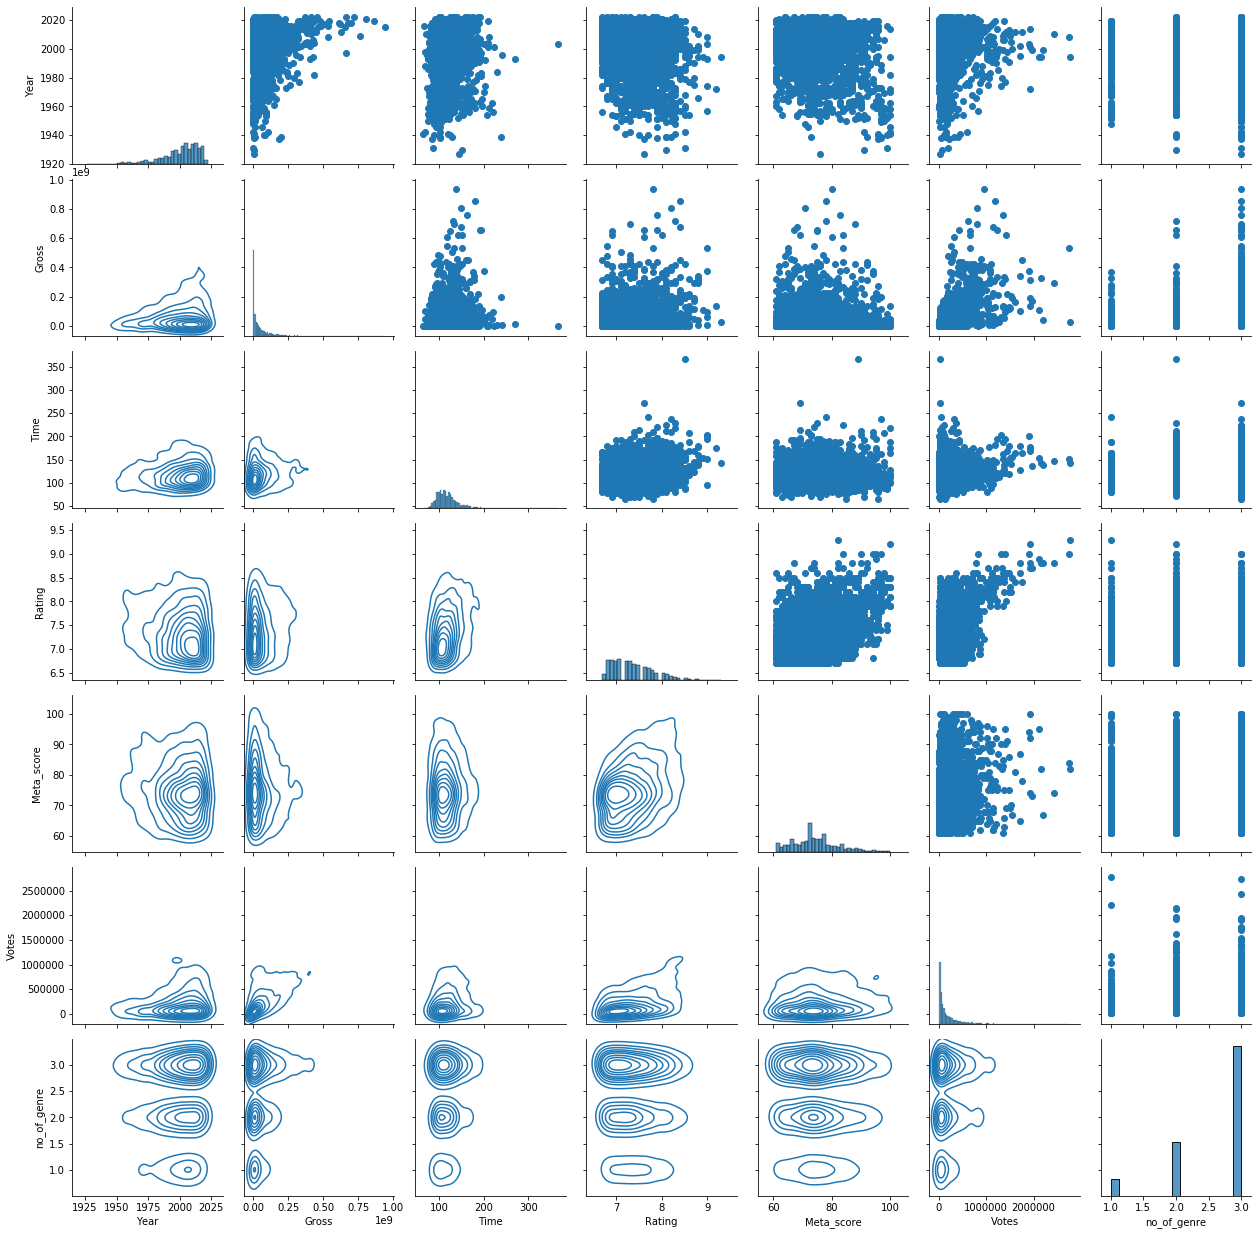

In [79]:
g=sns.PairGrid(df2)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

In [80]:
corr=df2.corr()

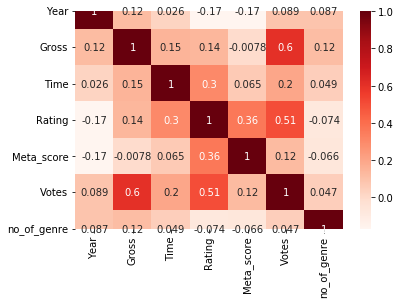

In [81]:
sns.heatmap(corr,annot=True,cmap='Reds')

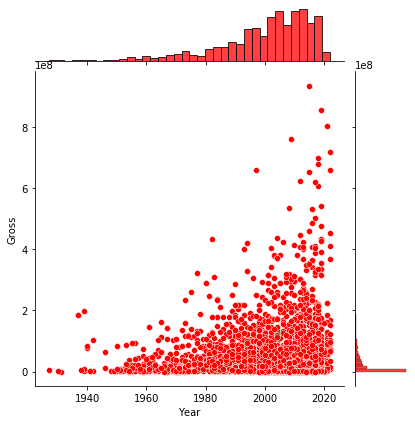

In [82]:
sns.jointplot(x='Year',y='Gross',data=df2,color="red")
plt.show()

In [83]:
df2["Gross"].corr(df2["Year"])

0.12065482438635564

Inference:We found out that there is no effective correlation between gross and Year.Also,We found that in the top 5000 movies most of movies are from the year 2000-2020.

In [84]:
a=df2.groupby('Rating').size().sort_index(ascending=True)

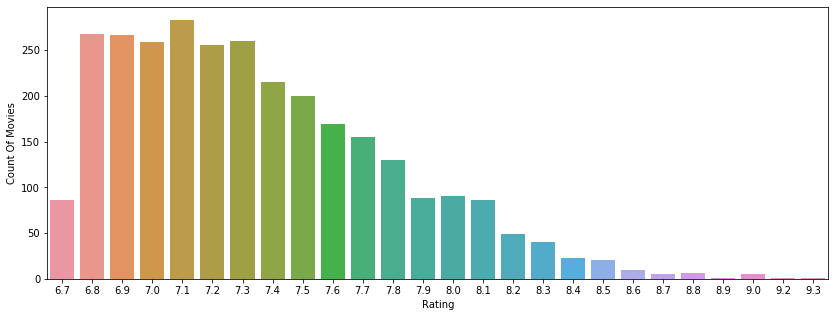

In [85]:
plt.figure(figsize=(14,5))
sns.barplot(x=a.index,y=a.values)
plt.ylabel("Count Of Movies")
plt.show()

Inference:In top 5000 Movies most movies are rated b/w 6.8 to 7.3.

In [86]:
b=df2.groupby('Rating_category').size().sort_values(ascending=False)
b

Rating_category
U            659
R            622
A            617
UA           584
PG-13        209
PG            79
Not Rated     65
18            43
16            18
13            13
15+           11
G             11
7              8
UA 16+         8
(Banned)       7
All            5
Unrated        4
12+            2
U/A            2
UA 13+         2
M/PG           1
GP             1
UA 7+          1
NC-17          1
dtype: int64

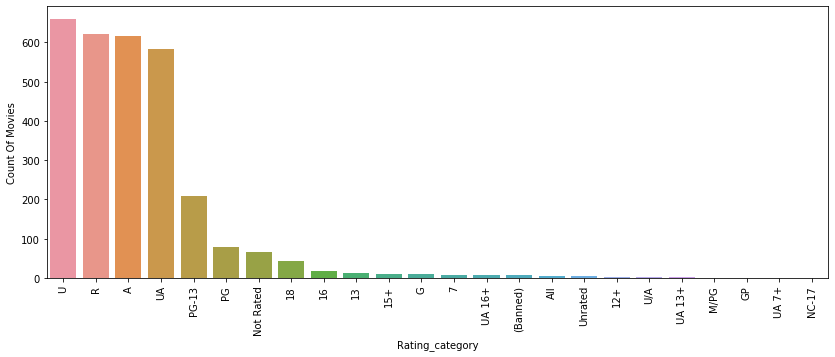

In [87]:
plt.figure(figsize=(14,5))
sns.barplot(x=b.index,y=b.values)
plt.ylabel("Count Of Movies")
plt.xticks(rotation=90)
plt.show()

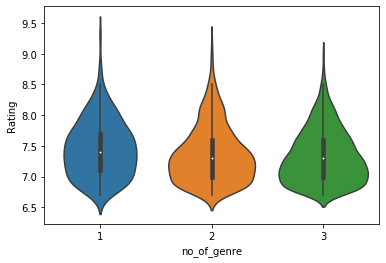

In [88]:
sns.violinplot(x=df2["no_of_genre"],y=df2["Rating"],data=df2)
plt.show()

Inference:The rating of the movies with one genre better than movies with multiple genre


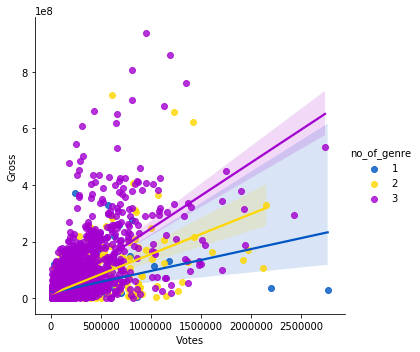

In [184]:
sns.lmplot(data=df2,x="Votes",y="Gross",hue='no_of_genre',palette="prism")
plt.show()

In [90]:
df2["Votes"].corr(df2["Gross"])

0.6031046099626146

Inference:It can be seen from  the scatter plot that there is positive correlation between Votes & Gross.however,there are some movies which have less votes but still has high gross and viceversa.

In [91]:
e=df2.groupby("Title")["Gross"].sum().sort_values(ascending=False)[:10]

In [92]:
e


Title
Star Wars: Episode VII - The Force Awakens (2015)    936660000
Avengers: Endgame (2019)                             858370000
Spider-Man: No Way Home (2021)                       804750000
Avatar (2009)                                        760510000
Top Gun: Maverick (2022)                             718730000
Black Panther (2018)                                 700060000
Avengers: Infinity War (2018)                        678820000
Avatar: The Way of Water (2022)                      659680000
Titanic (1997)                                       659330000
Jurassic World (2015)                                652270000
Name: Gross, dtype: int64

In [93]:
f=df2.groupby("Title")["Votes"].sum().sort_values(ascending=False)[:10]

In [94]:
f

Title
The Shawshank Redemption (1994)                             2765336
The Dark Knight (2008)                                      2738627
Inception (2010)                                            2430231
Fight Club (1999)                                           2202148
Forrest Gump (1994)                                         2150931
Pulp Fiction (1994)                                         2122943
The Matrix (1999)                                           1969889
Interstellar (2014)                                         1935264
The Lord of the Rings: The Fellowship of the Ring (2001)    1926229
The Godfather (1972)                                        1924556
Name: Votes, dtype: int64

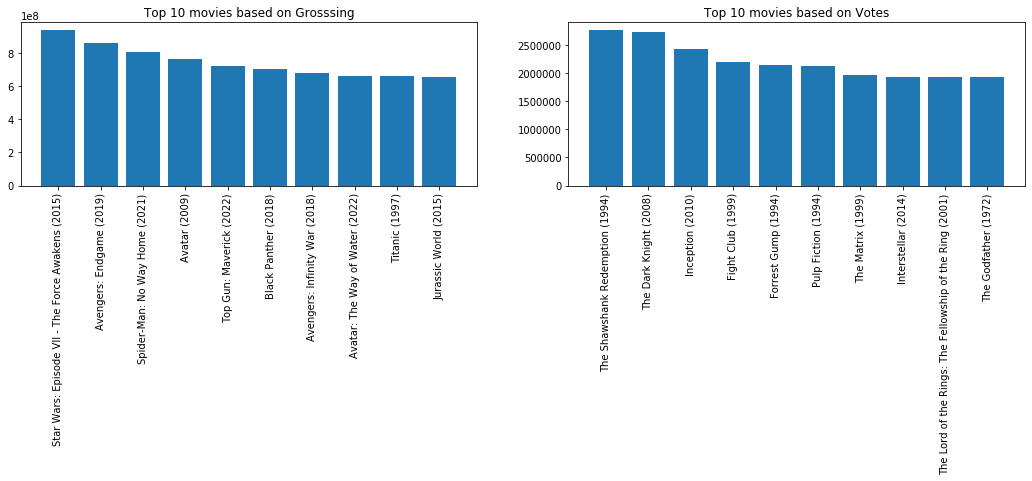

In [95]:

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18, 3))
axes[0].bar(x=e.index,height=e.values)
axes[0].set_title('Top 10 movies based on Grosssing')
axes[0].set_xticklabels(e.index, rotation=90)

axes[1].bar(x=f.index,height=f.values)
axes[1].set_title('Top 10 movies based on Votes')
axes[1].set_xticklabels(f.index, rotation=90)


plt.show()

In [104]:
df2.duplicated().sum()

0

In [137]:
df3=df2.sort_values(by=['Rating','Meta_score'],ascending=False).head(20)

In [138]:
df4=df2.sort_values(by=['Meta_score'],ascending=False).head(20)
df4

,Year,Gross,Time,Rating,Meta_score,Votes,no_of_genre,Title,Rating_category,Director,Main Genre
95,1958,3200000,128,8.3,100,412908,3,Vertigo (1958),A,Alfred Hitchcock,Mystery
395,1946,10460000,102,7.9,100,104103,3,Notorious (1946),U,Alfred Hitchcock,Drama
1,1972,134970000,175,9.2,100,1924556,2,The Godfather (1972),A,Francis Ford Coppola,Crime
413,1970,540000,113,7.9,100,32226,1,Il conformista (1970),UA,Bernardo Bertolucci,Drama
375,2014,25380000,165,7.9,100,361041,1,Boyhood (I) (2014),A,Richard Linklater,Drama
98,1941,1590000,119,8.3,100,452689,2,Citizen Kane (1941),UA,Orson Welles,Drama
227,1982,4970000,188,8.1,100,65645,1,Fanny och Alexander (1982),A,Ingmar Bergman,Drama
229,1994,4040000,99,8.1,100,106784,3,Trois couleurs: Rouge (1994),U,Krzysztof Kieslowski,Drama
37,1942,1020000,102,8.5,100,586777,3,Casablanca (1942),U,Michael Curtiz,Drama
92,1962,44820000,218,8.3,100,302863,3,Lawrence of Arabia (1962),U,T.E. Lawrence,Adventure


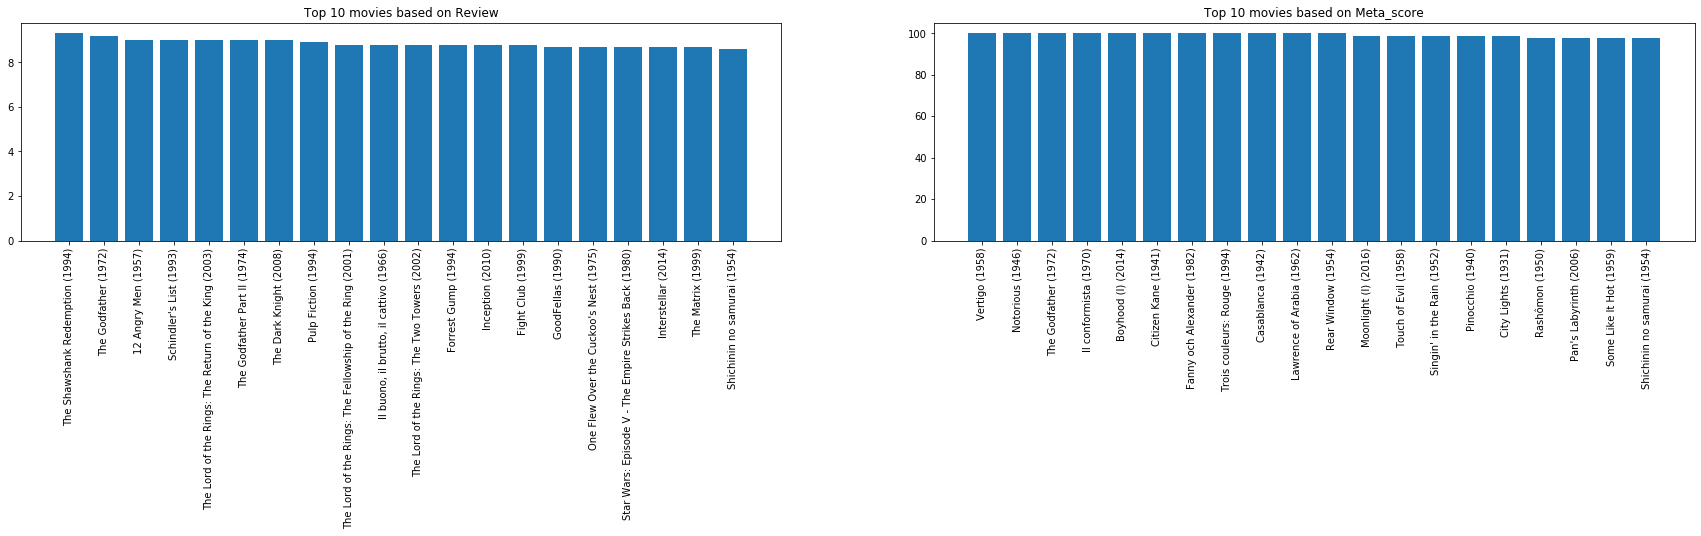

In [142]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(30,4))
axes[0].bar(x=df3["Title"],height=df3["Rating"])
axes[0].set_title('Top 10 movies based on Review')
axes[0].set_xticklabels(df3["Title"], rotation=90)


axes[1].bar(x=df4["Title"],height=df4["Meta_score"])
axes[1].set_title('Top 10 movies based on Meta_score')
axes[1].set_xticklabels(df4["Title"], rotation=90)
plt.show()

In [146]:
t=df2.groupby("Main Genre")["Time"].mean().sort_values(ascending=False).apply(int)
t

Main Genre
Western      150
Biography    124
Action       124
Drama        121
Adventure    120
Mystery      120
Crime        119
Fantasy      114
Thriller     112
Comedy       108
Romance      106
Sci-Fi       106
Film-Noir    104
Horror       103
Family       100
Animation     95
Music         93
Name: Time, dtype: int64

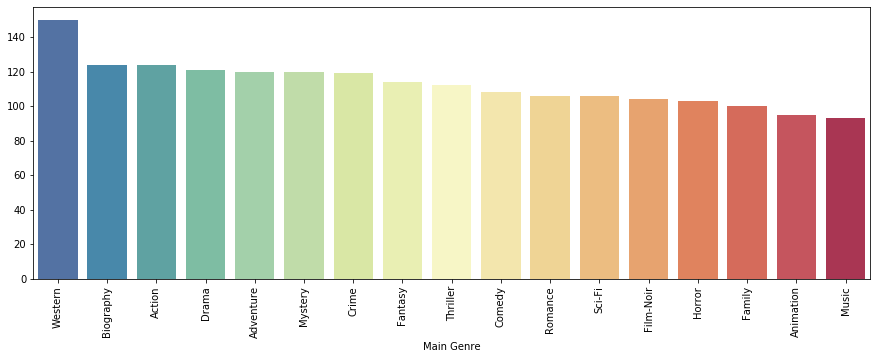

In [162]:
plt.figure(figsize=(15,5))
sns.barplot(x=t.index,y=t.values,palette='Spectral_r')
plt.xticks(rotation=90)
plt.show()